In [1]:
# savefig(fname, *, dpi='figure', format=None, bbox_inches=None, pad_inches=0.00001)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c = np.loadtxt('Center_kks_opts_2_nospin_50mini')
d = np.loadtxt('Center_kks_opts_2_spin_50mini')
a = np.loadtxt('nocenter_kks_opts_2_nospin_50mini')
b = np.loadtxt('nocenter_kks_opts_2_spin_50mini')

In [3]:
print(c)

[[5.54625000e-05 1.22982500e-04 1.48652500e-04 1.31045000e-04
  1.70105000e-04 1.07605000e-04 9.20125000e-05 8.13325000e-05
  1.53362500e-04 6.96625000e-05]
 [3.44329450e-02 3.20298850e-02 3.02847625e-02 3.29765200e-02
  3.11247625e-02 3.08084125e-02 3.05809450e-02 3.11195425e-02
  3.24423325e-02 3.17267325e-02]
 [3.53112500e-04 3.94000000e-05 3.06100000e-04 2.26225000e-05
  2.07050000e-04 1.64982500e-04 2.27432500e-04 6.39312500e-04
  2.84800000e-05 1.82532500e-04]]


In [4]:
print ("vanilla kk =", np.argmin(c[0])+1)
print("acc : ", np.min(c[0]))
print(" ")

print ("ADAM kk =", np.argmin(c[1])+1)
print("acc : ", np.min(c[1]))
print(" ")

print ("RMSprop kk =", np.argmin(c[2])+1)
print("acc : ", np.min(c[2]))
print(" ")

vanilla kk = 1
acc :  5.546250000000072e-05
 
ADAM kk = 3
acc :  0.030284762499999986
 
RMSprop kk = 4
acc :  2.26225000000004e-05
 


In [12]:
ccomb = np.mean(c, axis = 0)
dcomb = np.mean(d, axis = 0)
acomb = np.mean(a, axis = 0)
bcomb = np.mean(b, axis = 0)
print('min value error :', np.min(bcomb))
print('min k :', np.argmin(bcomb)+1)

min value error : 0.00018898333333333282
min k : 9


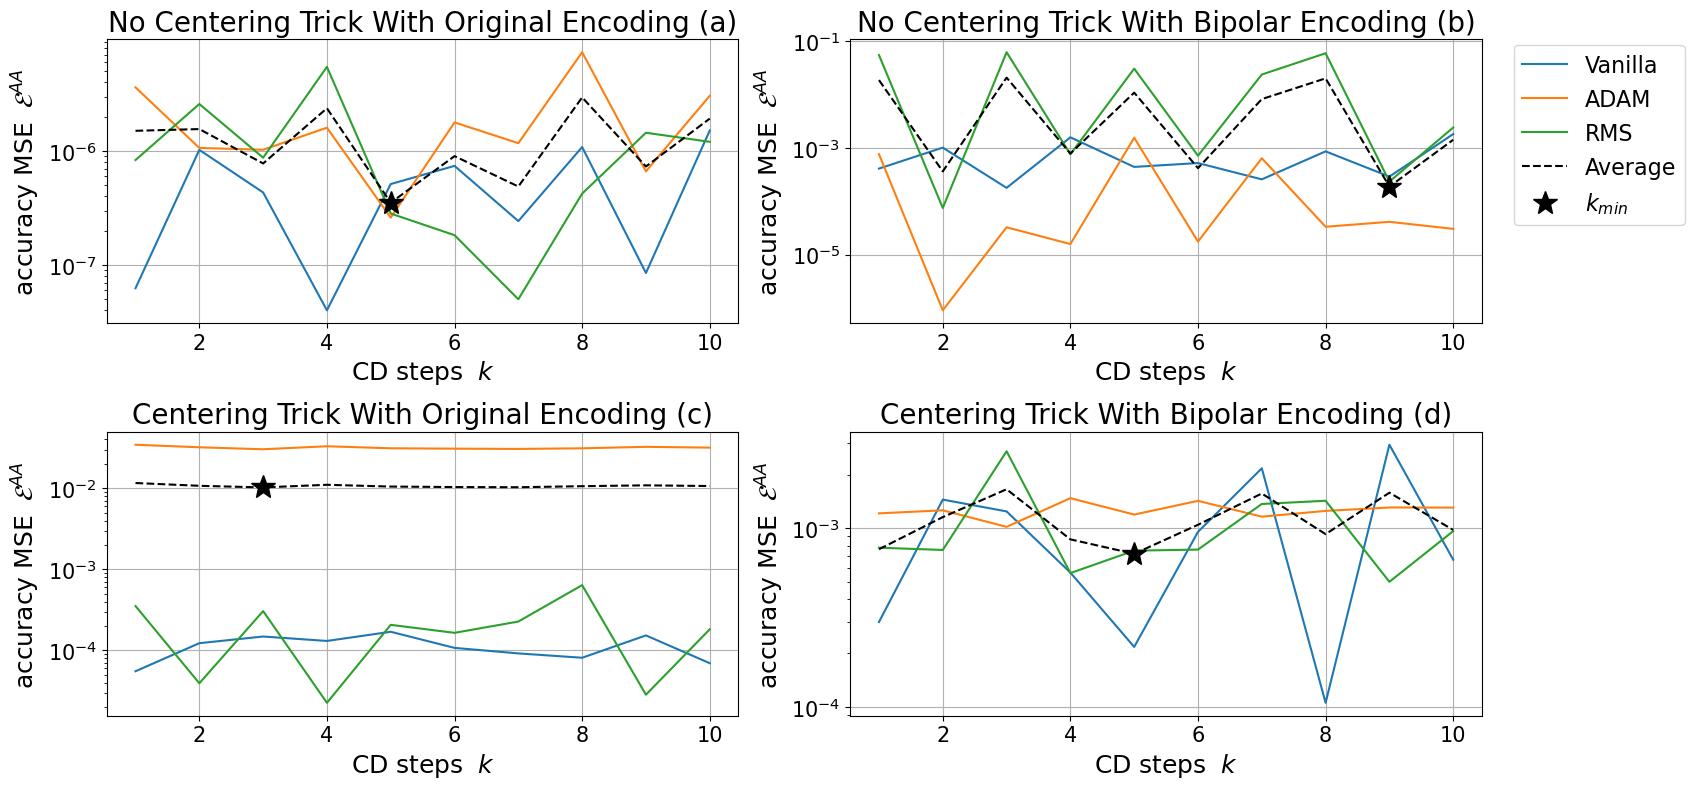

In [21]:
kk_list = [1,2,3,4, 5,6, 7,8,9,10]
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (17,8))
ax = axes[1][0] 
v = c
amin = np.where(ccomb==np.min(ccomb))[0][0]

ax.plot(kk_list, v[0], label='Vanilla')
ax.plot(kk_list, v[1], label='ADAM')
ax.plot(kk_list, v[2], label='RMS')
ax.plot(kk_list,ccomb,'--k', label ='Average')
ax.plot(amin+1,np.min(ccomb),'*k', label ='$k_{min}$', markersize = 18 )
ax.set_ylabel('accuracy MSE $ \;\mathcal{E}^{AA}$', size = 18)
ax.set_xlabel('CD steps $ \; k$', size = 18)
# ax.legend(fontsize = 16, ncol=2)
ax.tick_params(axis ='both',which="major",labelsize=15)
ax.set_title('Centering Trick With Original Encoding (c)', size = 20)
ax.grid()
# plt.locator_params(axis='y', nbins=5)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
fig.set_tight_layout(True)
ax.set_yscale('log')
# fig.subplots_adjust(bottom=, top=10, left=5, right=10)
# plt.savefig('c', dpi='figure', format=None, bbox_inches=None, pad_inches=1)


ax = axes[0][0] 
v = a
amin = np.where(acomb==np.min(acomb))[0][0]

ax.plot(kk_list, v[0], label='Vanilla')
ax.plot(kk_list, v[1], label='ADAM')
ax.plot(kk_list, v[2], label='RMS')
ax.plot(kk_list,acomb,'--k', label ='Average')
ax.plot(amin+1,np.min(acomb),'*k', label ='$k_{min}$',  markersize = 18)
ax.set_ylabel('accuracy MSE $ \;\mathcal{E}^{AA}$', size = 18)
ax.set_xlabel('CD steps $ \; k$', size = 18)
# ax.legend(fontsize = 16, ncol=2)
ax.tick_params(axis ='both',which="major",labelsize=15)
ax.set_title('No Centering Trick With Original Encoding (a)', size = 20)
ax.grid()
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
fig.set_tight_layout(True)
ax.set_yscale('log')


ax = axes[0][1] 
v = b
amin = np.where(bcomb==np.min(bcomb))[0][0]

ax.plot(kk_list, v[0], label='Vanilla')
ax.plot(kk_list, v[1], label='ADAM')
ax.plot(kk_list, v[2], label='RMS')
ax.plot(kk_list,bcomb,'--k', label ='Average')
ax.plot(amin+1,np.min(bcomb),'*k', label ='$k_{min}$',  markersize = 18)
ax.set_ylabel('accuracy MSE $ \;\mathcal{E}^{AA}$', size = 18)
ax.set_xlabel('CD steps $ \; k$', size = 18)
# ax.legend(fontsize = 16, ncol=2)
ax.tick_params(axis ='both',which="major",labelsize=15)
ax.set_title('No Centering Trick With Bipolar Encoding (b)', size = 20)
ax.grid()
ax.legend(fontsize = 16, bbox_to_anchor=(1.05,0.98),borderaxespad=0)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
fig.set_tight_layout(True)
ax.set_yscale('log')


ax = axes[1][1] 
v = d
amin = np.where(dcomb==np.min(dcomb))[0][0]

ax.plot(kk_list, v[0], label='Vanilla')
ax.plot(kk_list, v[1], label='ADAM')
ax.plot(kk_list, v[2], label='RMS')
ax.plot(kk_list,dcomb,'--k', label ='Average')
ax.plot(amin+1,np.min(dcomb),'*k', label ='$k_{min}$', markersize = 18)
ax.set_ylabel('accuracy MSE $ \;\mathcal{E}^{AA}$', size = 18)
ax.set_xlabel('CD steps $ \; k$', size = 18)
# ax.legend(fontsize = 16, ncol=2)
ax.tick_params(axis ='both',which="major",labelsize=15)
ax.set_title('Centering Trick With Bipolar Encoding (d)', size = 20)
ax.grid()
# plt.locator_params(axis='y', nbins=5)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
fig.set_tight_layout(True)
ax.set_yscale('log')


plt.savefig('all', dpi='figure', format=None, bbox_inches=None, pad_inches=1)
fig.subplots_adjust(right=0.75)
plt.show()

van min: 9.999999999997797e-09 ep : 265
adam min: 9.999999999997797e-09 ep : 24
rms min: 2.499999999999449e-09 ep : 20


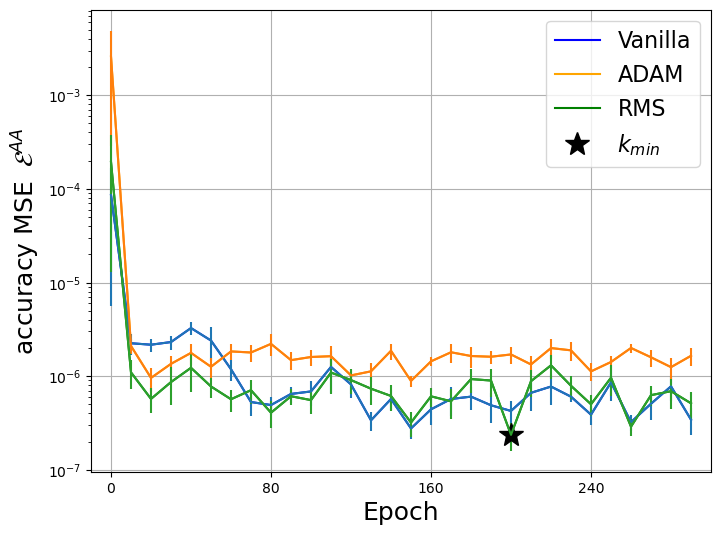

In [20]:
vanilla = np.loadtxt("acc_van_kk5_ep300_nc")
adam = np.loadtxt("acc_adam_kk5_ep300_nc")
rms = np.loadtxt("acc_rms_kk5_ep300_nc")
ax0 = 30
ax1 = 10

fig2, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,6))
# vanilla
nadvan = np.array(vanilla).reshape(ax0,ax1)
eciavan = np.mean(nadvan,axis = 1)
r = np.std(nadvan,axis=1)/np.sqrt(ax1)
# print(ecia)

# plt.plot(Acc_tot[0::])
plt.plot(np.arange(ax0)*ax1,eciavan, label='Vanilla', color='blue')
plt.errorbar(np.arange(ax0)*ax1,eciavan,r)
plt.yscale('log')
# plt.hlines(0.5, 0,ep)


# adam
nadadam = np.array(adam).reshape(ax0,ax1)
eciaadam = np.mean(nadadam,axis = 1)
r = np.std(nadadam,axis=1)/np.sqrt(ax1)
plt.plot(np.arange(ax0)*ax1,eciaadam, label='ADAM', color='orange')
plt.errorbar(np.arange(ax0)*ax1,eciaadam,r)
plt.yscale('log')


# rms
nadrms = np.array(rms).reshape(ax0,ax1)
eciarms = np.mean(nadrms,axis = 1)
r = np.std(nadrms,axis=1)/np.sqrt(ax1)

plt.plot(np.arange(ax0)*ax1,eciarms, label='RMS', color='green')
plt.errorbar(np.arange(ax0)*ax1,eciarms,r)
plt.plot(200,(np.min((eciarms))),'*k', label ='$k_{min}$',  markersize = 18)

ax.grid()
ax.set_xlim(-10,300)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_ylabel('accuracy MSE $ \;\mathcal{E}^{AA}$', size = 18)
ax.set_xlabel('Epoch', size = 18)
ax.legend(fontsize = 16)
plt.yscale('log')
# ax.set_aspect('equal')


plt.savefig('best_acc', dpi='figure', format=None, bbox_inches='tight', pad_inches=0.05)

print('van min:',np.min(vanilla),'ep :', np.argmin(vanilla))
print('adam min:',np.min(adam),'ep :', np.argmin(adam))
print('rms min:',np.min(rms),'ep :', np.argmin(eciarms))
